# <p><span style="color: #000080; background-color: #ffffff;"><strong>Following is some statistical analysis of Covid19 data for India Pune and Mumbai&nbsp;</strong></span></p>
<hr />
<p>&nbsp;</p>

In [1]:

import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import json 
import requests
from pandas.io.json import json_normalize 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


r = requests.get('https://api.covid19india.org/raw_data.json')
data=r.json()
dmp=json.dumps(data)
p_obj = json.loads(dmp)
#print(json.dumps(p_obj,sort_keys=True, indent=4))
#df=pd.read_json('https://api.covid19india.org/raw_data.json')
df = json_normalize(data, 'raw_data', errors='ignore')
df['dateannounced'] = pd.to_datetime(df['dateannounced'],format='%d/%m/%Y', errors='coerce')
df['statuschangedate'] = pd.to_datetime(df['statuschangedate'],format='%d/%m/%Y', errors='coerce')

df['currentstatus']= df['currentstatus'].replace('Migrated', 3) 
df['currentstatus']= df['currentstatus'].replace('Recovered', 2) 
df['currentstatus']= df['currentstatus'].replace('Hospitalized', 1) 
df['currentstatus']= df['currentstatus'].replace('Deceased', 9) 


df['currentstatus'] = pd.to_numeric(df['currentstatus'], downcast="float",errors='coerce')
df['currentstatus'] = df['currentstatus'].fillna(0)
 

# <p><strong><span style="color: #ff6600;">India</span> <span style="color: #000080;">predicted numbers using linear regression</span></strong></p>
<hr />
<p>&nbsp;</p>

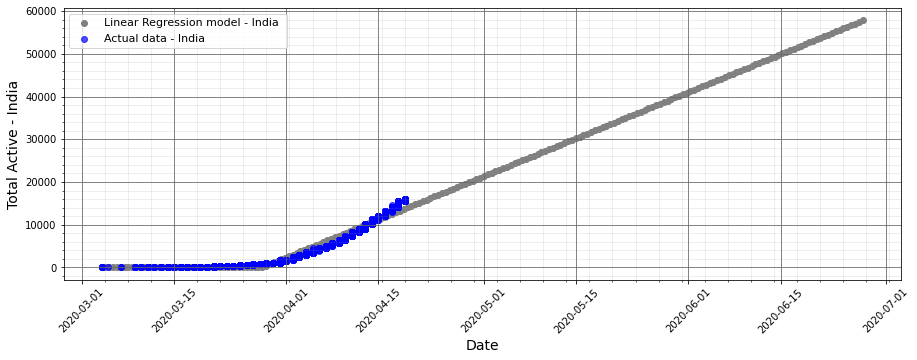

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

%matplotlib inline

df1 = df[df.currentstatus==1.0]
y=np.array(df1['currentstatus'].dropna().values.cumsum(), dtype=float)
x=np.array(df1['dateannounced'],dtype=float)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

model=lm().fit(x_train,y_train)


#df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
#df2
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

x_test=np.array(x_test,dtype='datetime64[ns]')

x_pred = np.linspace(x.min(), x.max()+6000000000000000, 200)
x_pred = x_pred.reshape(-1, 1)
y_pred=  model.predict(x_pred)
x_pred = np.array(x_pred ,dtype='datetime64[ns]')
x = np.array(x ,dtype='datetime64[ns]')
y_pred  = [0 if i < 0 else i for i in y_pred]

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x_pred, y_pred, color='grey', label='Linear Regression model - India ')
ax.scatter(x,y, edgecolor='blue', facecolor='blue', alpha=0.7, label='Actual data - India')
ax.set_ylabel('Total Active - India', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.xticks(rotation=45)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
ax.legend(facecolor='white', fontsize=11);



# <p><strong><span style="color: #ff6600;">Pune</span> <span style="color: #003366;">predicted numbers using linear rgression</span></strong></p>
<hr />
<p>&nbsp;</p>

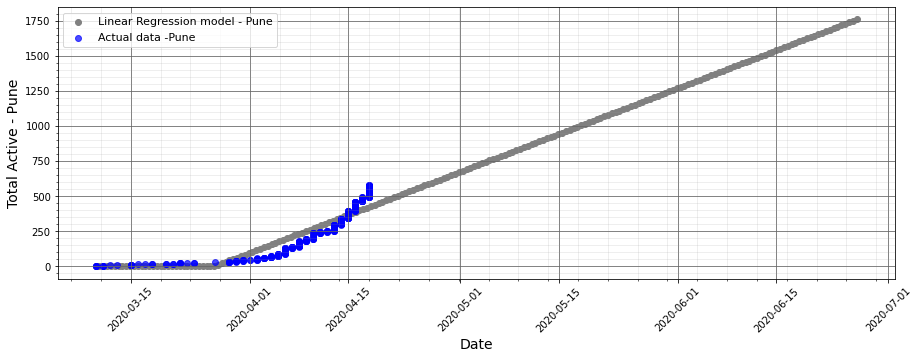

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
%matplotlib inline


df_filtered_Maharashtra = df[df.detectedstate=="Maharashtra"]
df_filtered_Pune = df[df.detecteddistrict=="Pune"]
y = pd.value_counts(df_filtered_Pune['dateannounced'])
x = df_filtered_Maharashtra.dateannounced


df1 = df_filtered_Pune[df_filtered_Pune.currentstatus==1.0]
y=np.array(df1['currentstatus'].dropna().values.cumsum(), dtype=float)
x=np.array(df1['dateannounced'],dtype=float)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

model=lm().fit(x_train,y_train)
x_test=np.array(x_test,dtype='datetime64[ns]')

#plt.figure(figsize=(15,5))
#plt.scatter(x_test,y_pred)
#plt.xticks(rotation=45)

x_pred = np.linspace(x.min(), x.max()+6000000000000000, 200)           
x_pred = x_pred.reshape(-1, 1)
y_pred=model.predict(x_pred)
x_pred =np.array(x_pred ,dtype='datetime64[ns]')
x =np.array(x ,dtype='datetime64[ns]')
y_pred  = [0 if i < 0 else i for i in y_pred]

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x_pred, y_pred, color='grey', label='Linear Regression model - Pune')
ax.scatter(x,y, edgecolor='blue', facecolor='blue', alpha=0.7, label='Actual data -Pune')
ax.set_ylabel('Total Active - Pune', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.xticks(rotation=45)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
ax.legend(facecolor='white', fontsize=11);




# <p><strong><span style="color: #ff6600;">Mumbai</span> <span style="color: #003366;">predicted numbers using linear rgression</span></strong></p>
<hr />
<p>&nbsp;</p>

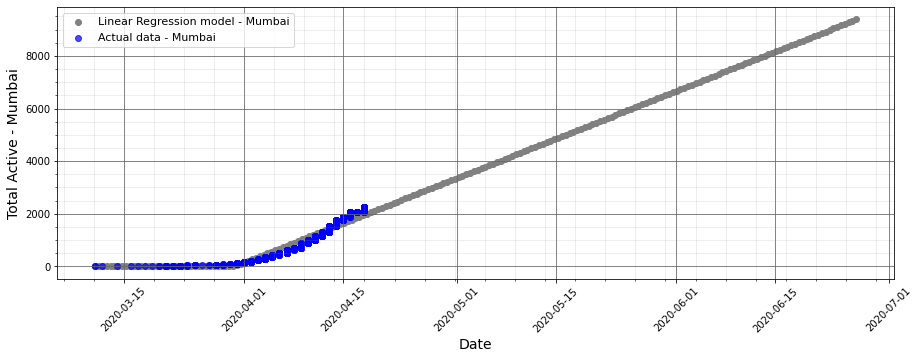

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
%matplotlib inline


df_filtered_Maharashtra = df[df.detectedstate=="Maharashtra"]
df_filtered_Pune = df[df.detecteddistrict=="Mumbai"]
y = pd.value_counts(df_filtered_Pune['dateannounced'])
x = df_filtered_Maharashtra.dateannounced


df1 = df_filtered_Pune[df_filtered_Pune.currentstatus==1.0]
y=np.array(df1['currentstatus'].dropna().values.cumsum(), dtype=float)
x=np.array(df1['dateannounced'],dtype=float)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

model=lm().fit(x_train,y_train)
x_test=np.array(x_test,dtype='datetime64[ns]')


x_pred = np.linspace(x.min(), x.max()+6000000000000000, 200)         
x_pred = x_pred.reshape(-1, 1)
y_pred=model.predict(x_pred)
x_pred =np.array(x_pred ,dtype='datetime64[ns]')
x =np.array(x ,dtype='datetime64[ns]')
y_pred  = [0 if i < 0 else i for i in y_pred]

#df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
#df2
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))




fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x_pred, y_pred, color='grey', label='Linear Regression model - Mumbai')
ax.scatter(x,y, edgecolor='blue', facecolor='blue', alpha=0.7, label='Actual data - Mumbai')
ax.set_ylabel('Total Active - Mumbai', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.xticks(rotation=45)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
ax.legend(facecolor='white', fontsize=11);





# <p><strong><span style="color: #ff6600;">India</span> <span style="color: #003366;">predicted numbers using polynomial regression</span></strong></p>
<hr />
<p>&nbsp;</p>

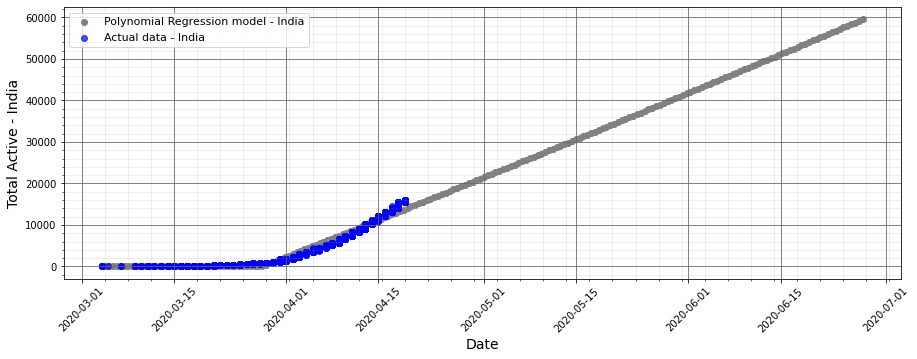

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

df1 = df[df.currentstatus==1.0]
y=np.array(df1['currentstatus'].dropna().values.cumsum(), dtype=float)
x=np.array(df1['dateannounced'],dtype=float)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


# Fitting Polynomial Regression to the dataset

poly_features = PolynomialFeatures(degree=15)


  # transforms the existing features to higher degree features.
x_train_poly = poly_features.fit_transform(x_train)
  
  # fit the transformed features to Linear Regression
poly_model = lm()
poly_model.fit(x_train_poly, y_train)
  

x_pred = np.linspace(x.min(), x.max()+6000000000000000, 200)         
x_pred = x_pred.reshape(-1, 1)
x_pred =np.array(x_pred ,dtype='datetime64[ns]')
x =np.array(x ,dtype='datetime64[ns]')

y_pred = poly_model.predict(poly_features.fit_transform(x_pred))
y_pred  = [0 if i < 0 else i for i in y_pred]

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x_pred, y_pred, color='grey', label='Polynomial Regression model - India')
ax.scatter(x,y, edgecolor='blue', facecolor='blue', alpha=0.7, label='Actual data - India')
ax.set_ylabel('Total Active - India', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.xticks(rotation=45)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
ax.legend(facecolor='white', fontsize=11);




# <p><strong><span style="color: #ff6600;">Pune</span> <span style="color: #003366;">predicted numbers using polynomial regression</span></strong></p>
<hr />
<p>&nbsp;</p>

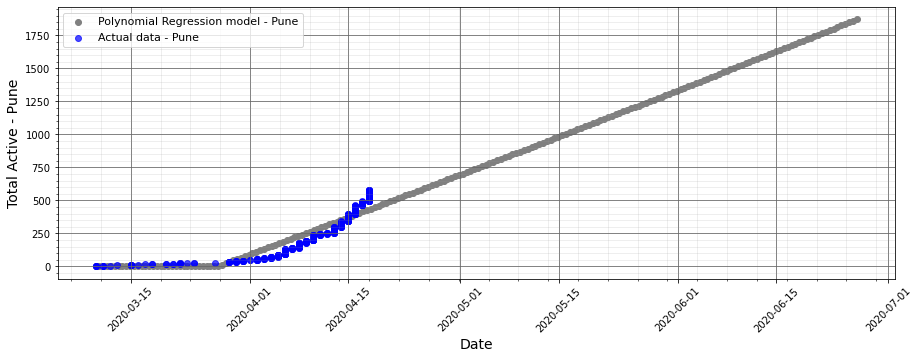

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


df_filtered_Maharashtra = df[df.detectedstate=="Maharashtra"]
df_filtered_Pune = df[df.detecteddistrict=="Pune"]
y = pd.value_counts(df_filtered_Pune['dateannounced'])
x = df_filtered_Maharashtra.dateannounced


df1 = df_filtered_Pune[df_filtered_Pune.currentstatus==1.0]
y=np.array(df1['currentstatus'].dropna().values.cumsum(), dtype=float)
x=np.array(df1['dateannounced'],dtype=float)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


# Fitting Polynomial Regression to the dataset

poly_features = PolynomialFeatures(degree=15)


  # transforms the existing features to higher degree features.
x_train_poly = poly_features.fit_transform(x_train)
  
  # fit the transformed features to Linear Regression
poly_model = lm()
poly_model.fit(x_train_poly, y_train)
  

x_pred = np.linspace(x.min(), x.max()+6000000000000000, 200)         
x_pred = x_pred.reshape(-1, 1)
x_pred =np.array(x_pred ,dtype='datetime64[ns]')
x =np.array(x ,dtype='datetime64[ns]')

y_pred = poly_model.predict(poly_features.fit_transform(x_pred))
y_pred  = [0 if i < 0 else i for i in y_pred]

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x_pred, y_pred, color='grey', label='Polynomial Regression model - Pune')
ax.scatter(x,y, edgecolor='blue', facecolor='blue', alpha=0.7, label='Actual data - Pune')
ax.set_ylabel('Total Active - Pune', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.xticks(rotation=45)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
ax.legend(facecolor='white', fontsize=11);



